# Notebook to create the json file for event_detection visualization using the data provided [here](https://github.com/dsar/mobility_pattern_detection)

In [1]:
import pandas as pd
import csv
import time
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_path = "data/"

In [3]:
list_data = glob.glob(data_path+'*.csv')

In [4]:
detected_file = []
for event_file in list_data:
    detected_file.append(pd.read_csv(event_file, sep = "|", index_col=0))

### concatenate in one dataframe the data from 2010 to 2016

In [5]:
detected_event_data = pd.concat(detected_file)

In [6]:
detected_event_data.reset_index(inplace=True, drop=True)
detected_event_data.sort_values('usersPerHashtag',ascending=False,).head()

,hashtag,dayOfTweet,usersPerHashtag,spamEvent,std,approxLocation
12,#brexit,2016-06-24,186,False,261.680985,"('47.719', '8.623')"
8465,#prayforparis,2015-11-14,131,False,343.310548,"('46.205', '6.143')"
15295,#nma,2013-12-14,127,False,84.671164,"('47.262', '6.032')"
8466,#jesuischarlie,2015-01-07,119,False,170.470379,"('47.485', '6.914')"
8467,#charliehebdo,2015-01-07,113,False,210.028082,"('46.205', '6.143')"


##  PREPROCESSING 

In [8]:
detected_event_data.usersPerHashtag.max()

186

In [11]:
detected_event_data.plot?

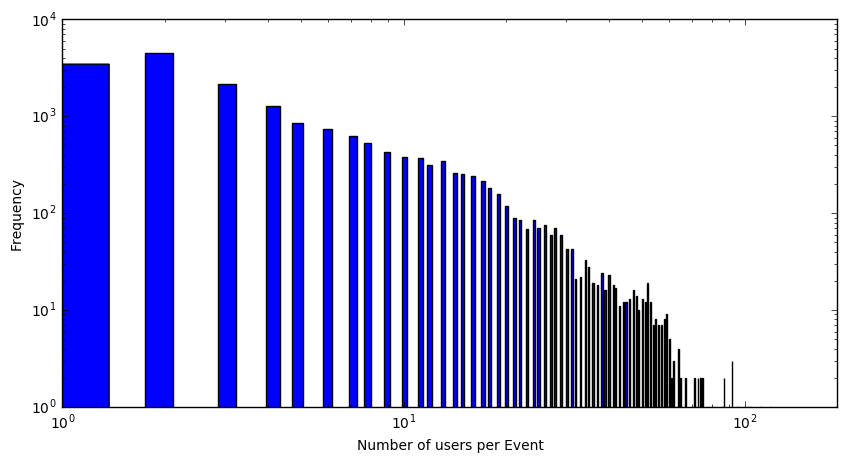

In [16]:
ax = detected_event_data.usersPerHashtag.plot(kind="hist", bins = 500, 
                         figsize=(10,5),xlim=(0,detected_event_data.usersPerHashtag.max()+1),
                        loglog=True)
ax.set_xlabel("Number of users per Event")

### Keep only the events which have at least 5 persons who tweets about the event

In [9]:
total_event = detected_event_data.shape[0]
total_event_at_least_5 = detected_event_data[detected_event_data.usersPerHashtag > 5].shape[0]
prop = total_event_at_least_5/float(total_event) * 100

In [10]:
print "Total event : {} \nTotal event with at least 5 users : {} \nProportion keeped : {}".format(total_event,total_event_at_least_5,prop) 

Total event : 18694 
Total event with at least 5 users : 6400 
Proportion keeped : 34.2355836097


In [11]:
detected_event_data = detected_event_data[detected_event_data.usersPerHashtag > 5]

####  rename the std column to avoid any trouble with series.std

In [12]:
detected_event_data.rename(columns={'std':'std_metrics'}, inplace=True)

#### change the date format and add in the same time the number of tweets per day

In [13]:
from datetime import datetime

In [14]:
date_format = "%Y-%m-%d"

In [15]:
detected_event_data['dayOfTweet'] = pd.to_datetime(detected_event_data['dayOfTweet'],format = date_format,errors='coerce')

In [16]:
detected_event_data.head()

,hashtag,dayOfTweet,usersPerHashtag,spamEvent,std_metrics,approxLocation
12,#brexit,2016-06-24,186,False,261.680985,"('47.719', '8.623')"
13,#euro2016,2016-06-27,96,False,165.867610,"('46.954', '7.395')"
14,#suifra,2016-06-19,95,False,108.932860,"('46.529', '6.652')"
15,#frapor,2016-07-10,87,False,174.980705,"('46.205', '6.143')"
16,#sui,2016-06-19,87,False,172.971667,"('46.894', '7.055')"


In [17]:
new_date_format = '%Y-%m-%dT%H:%M:%SZ'

In [18]:
def change_date_format(ds):
    return ds.strftime('%Y-%m-%dT%H:%M:%SZ')
    

In [19]:
detected_event_data['dayOfTweet'] = detected_event_data['dayOfTweet'].apply(change_date_format)

In [20]:
detected_event_data.head()

,hashtag,dayOfTweet,usersPerHashtag,spamEvent,std_metrics,approxLocation
12,#brexit,2016-06-24T00:00:00Z,186,False,261.680985,"('47.719', '8.623')"
13,#euro2016,2016-06-27T00:00:00Z,96,False,165.867610,"('46.954', '7.395')"
14,#suifra,2016-06-19T00:00:00Z,95,False,108.932860,"('46.529', '6.652')"
15,#frapor,2016-07-10T00:00:00Z,87,False,174.980705,"('46.205', '6.143')"
16,#sui,2016-06-19T00:00:00Z,87,False,172.971667,"('46.894', '7.055')"


In [21]:
detected_event_data.sort_values('usersPerHashtag',ascending=False,).head()

,hashtag,dayOfTweet,usersPerHashtag,spamEvent,std_metrics,approxLocation
12,#brexit,2016-06-24T00:00:00Z,186,False,261.680985,"('47.719', '8.623')"
8465,#prayforparis,2015-11-14T00:00:00Z,131,False,343.310548,"('46.205', '6.143')"
15295,#nma,2013-12-14T00:00:00Z,127,False,84.671164,"('47.262', '6.032')"
8466,#jesuischarlie,2015-01-07T00:00:00Z,119,False,170.470379,"('47.485', '6.914')"
8467,#charliehebdo,2015-01-07T00:00:00Z,113,False,210.028082,"('46.205', '6.143')"


In [22]:
import re

In [23]:
def getLatitude(df):
    coord_list = re.findall(r"[-+]?\d*\.\d+|\d+", df.approxLocation)
    return float(coord_list[0])

In [24]:
def getLongitude(df):
    coord_list = re.findall(r"[-+]?\d*\.\d+|\d+", df.approxLocation)
    return float(coord_list[1])

In [25]:
detected_event_data['eventLatitude'] = detected_event_data.apply(getLatitude,axis=1)

In [26]:
detected_event_data['eventLongitude'] = detected_event_data.apply(getLongitude,axis=1)

In [27]:
detected_event_data.drop('approxLocation',axis=1,inplace=True)

In [28]:
detected_event_data.head()

,hashtag,dayOfTweet,usersPerHashtag,spamEvent,std_metrics,eventLatitude,eventLongitude
12,#brexit,2016-06-24T00:00:00Z,186,False,261.680985,47.719,8.623
13,#euro2016,2016-06-27T00:00:00Z,96,False,165.867610,46.954,7.395
14,#suifra,2016-06-19T00:00:00Z,95,False,108.932860,46.529,6.652
15,#frapor,2016-07-10T00:00:00Z,87,False,174.980705,46.205,6.143
16,#sui,2016-06-19T00:00:00Z,87,False,172.971667,46.894,7.055


on the json we'll keep hashtag, dayOfTweet, usersPerHashtag, std_metrics,eventlatitude and eventlongitude, we also add the std min and max for each point to facilitate the displaying part in javascript

## finally we'll get a json file like that 

In [29]:
{"type":"Feature","geometry":{"type":"Point","coordinates":[47.383,8.536]},"geometry_name":"tweet_information","properties":{"hashtag":"#tedxzh","dayOfTweet":"2010-10-20T00:00:00Z","eventLongitude":8.536,"eventLatitude":47.383,"std_metrics":195.753539, "usersPerHashtag":8, "std_min":63.0, "std_max":202.0}}

{'geometry': {'coordinates': [47.383, 8.536], 'type': 'Point'},
 'geometry_name': 'tweet_information',
 'properties': {'dayOfTweet': '2010-10-20T00:00:00Z',
  'eventLatitude': 47.383,
  'eventLongitude': 8.536,
  'hashtag': '#tedxzh',
  'std_max': 202.0,
  'std_metrics': 195.753539,
  'std_min': 63.0,
  'usersPerHashtag': 8},
 'type': 'Feature'}

In [30]:
import json

In [31]:
# gjson is the main dictionary
gjson_dict={}
gjson_dict["type"]= "FeatureCollection"
feat_list = []


In [32]:
gjson_dict

{'type': 'FeatureCollection'}

In [33]:
from geojson import Point

In [34]:

# Loop through all the courses, building a list entry which is itself a dictionary
# Each of these dictionaries has nested within it a type dictionary, which contains a point dictionary and a properties dictionary 
for index in detected_event_data.index:
    type_dict = {}
    pt_dict = {}
    prop_dict = {}
    type_dict["type"]= "Feature"
    pt_dict["type"]="Point"

    # GEOJSON looks for long,lat so reverse order
    type_dict["geometry"]=Point((detected_event_data.loc[index].eventLongitude,
                                 detected_event_data.loc[index].eventLatitude))
    
    prop_dict["dayOfTweet"] = detected_event_data.loc[index].dayOfTweet
    prop_dict["hashtag"] = detected_event_data.loc[index].hashtag
    prop_dict["std_metrics"]= detected_event_data.loc[index].std_metrics
    prop_dict["eventLongitude"]= detected_event_data.loc[index].eventLongitude
    prop_dict["eventLatitude"]= detected_event_data.loc[index].eventLatitude
    prop_dict["usersPerHashtag"] = detected_event_data.loc[index].usersPerHashtag
    prop_dict['min_std'] = round(detected_event_data.std_metrics.min())
    prop_dict['max_std'] = round(detected_event_data.std_metrics.max())
    type_dict["properties"]=prop_dict
    feat_list.append(type_dict)
    
gjson_dict["features"] = feat_list



In [35]:

# Serialize JSON for writing to file
json_path = './data/event_detection.json'
with open(json_path, 'w') as outfile:
     json.dump(gjson_dict, outfile, sort_keys = True, indent = 4, ensure_ascii=False)
